# Lifespark Technologies Private Limited Assignement
- A simple classification model to predicts the probability of freezing for each time point.
- We can train our own Neural network to get better results from the given dataset, but for this assignment, we will be using inhouse classification models.

In [28]:
#Get the dataset from github Repository
!git clone https://github.com/BhatnagarKshitij/LifesparkAssignement.git

fatal: destination path 'LifesparkAssignement' already exists and is not an empty directory.


In [2]:
#Import required Libraries
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
#To find model accuracy
from sklearn.metrics import confusion_matrix

In [29]:
datasetPath="/content/LifesparkAssignement/dataset_fog_release/dataset"
cols = ['Time', 'ankle-x', 'ankle-y', 'ankle-z', 
            'thigh-x', 'thigh-y', 'thigh-z',
            'trunk-x', 'trunk-y', 'trunk-z', 'annontations']

17

In [4]:
#Creating list of panda's Object
dataList=[]
# creating data frames
for name in os.listdir(datasetPath):
    df = pd.read_csv(datasetPath+'/' + name, header = None, sep=' ')
      
    # adding column headings
    df.columns = cols
    #Removing 0 as 0: not part of the experiment. For instance the sensors are installed on the user or the user is performing activities unrelated to the experimental protocol, such as debriefing
    df = df[df.annontations != 0]  
    dataList.append(df)

## Data Insights and Visualization

Analyze the data

In [5]:
for obj in dataList:
    print(obj.describe())
    print("-"*100)


               Time       ankle-x       ankle-y       ankle-z       thigh-x  \
count  9.280200e+04  92802.000000  92802.000000  92802.000000  92802.000000   
mean   1.514650e+06   -251.592854    962.059848    359.829433    194.668897   
std    4.330372e+05    572.797937    355.215933    290.794891    525.512189   
min    7.500000e+05  -5020.000000  -4490.000000  -4950.000000  -3418.000000   
25%    1.162488e+06   -313.000000    872.000000    277.000000   -154.000000   
50%    1.524992e+06   -191.000000    970.000000    356.000000     90.000000   
75%    1.887496e+06    -40.000000   1009.000000    455.000000    763.000000   
max    2.250000e+06   5090.000000   4784.000000   4752.000000   3963.000000   

            thigh-y       thigh-z       trunk-x       trunk-y       trunk-z  \
count  92802.000000  92802.000000  92802.000000  92802.000000  92802.000000   
mean     809.908332    248.888343      9.364863    995.735803    127.470733   
std      356.628057    187.444701    168.013721    

Check for Null values

In [6]:
for  obj  in dataList:
    for col in obj:
        print(col, obj[col].isna().sum())
    print("-"*100)

Time 0
ankle-x 0
ankle-y 0
ankle-z 0
thigh-x 0
thigh-y 0
thigh-z 0
trunk-x 0
trunk-y 0
trunk-z 0
annontations 0
----------------------------------------------------------------------------------------------------
Time 0
ankle-x 0
ankle-y 0
ankle-z 0
thigh-x 0
thigh-y 0
thigh-z 0
trunk-x 0
trunk-y 0
trunk-z 0
annontations 0
----------------------------------------------------------------------------------------------------
Time 0
ankle-x 0
ankle-y 0
ankle-z 0
thigh-x 0
thigh-y 0
thigh-z 0
trunk-x 0
trunk-y 0
trunk-z 0
annontations 0
----------------------------------------------------------------------------------------------------
Time 0
ankle-x 0
ankle-y 0
ankle-z 0
thigh-x 0
thigh-y 0
thigh-z 0
trunk-x 0
trunk-y 0
trunk-z 0
annontations 0
----------------------------------------------------------------------------------------------------
Time 0
ankle-x 0
ankle-y 0
ankle-z 0
thigh-x 0
thigh-y 0
thigh-z 0
trunk-x 0
trunk-y 0
trunk-z 0
annontations 0
------------------------------------

```
1: experiment, no freeze (can be any of stand, walk, turn)
2: freeze
```
Counting the number of instance in the class


In [30]:
for obj in dataList:
    print("Count of 1's: "+str(obj.iloc[:,-1].tolist().count(1)))
    print("Count of 2's: "+str(obj.iloc[:,-1].tolist().count(2)))
    print("-"*100)

Count of 1's: 87655
Count of 2's: 5147
----------------------------------------------------------------------------------------------------
Count of 1's: 132482
Count of 2's: 0
----------------------------------------------------------------------------------------------------
Count of 1's: 19842
Count of 2's: 0
----------------------------------------------------------------------------------------------------
Count of 1's: 56889
Count of 2's: 8072
----------------------------------------------------------------------------------------------------
Count of 1's: 142722
Count of 2's: 0
----------------------------------------------------------------------------------------------------
Count of 1's: 27254
Count of 2's: 1547
----------------------------------------------------------------------------------------------------
Count of 1's: 52905
Count of 2's: 13017
----------------------------------------------------------------------------------------------------
Count of 1's: 94078
Count 

In [31]:
#Alternative way to count instances in class
for obj in dataList:
    print(obj["annontations"].value_counts())
    print("-"*100)

1    87655
2     5147
Name: annontations, dtype: int64
----------------------------------------------------------------------------------------------------
1    132482
Name: annontations, dtype: int64
----------------------------------------------------------------------------------------------------
1    19842
Name: annontations, dtype: int64
----------------------------------------------------------------------------------------------------
1    56889
2     8072
Name: annontations, dtype: int64
----------------------------------------------------------------------------------------------------
1    142722
Name: annontations, dtype: int64
----------------------------------------------------------------------------------------------------
1    27254
2     1547
Name: annontations, dtype: int64
----------------------------------------------------------------------------------------------------
1    52905
2    13017
Name: annontations, dtype: int64
----------------------------------------

In [32]:
#Checking for column values
dataList[0].columns

Index(['Time', 'ankle-x', 'ankle-y', 'ankle-z', 'thigh-x', 'thigh-y',
       'thigh-z', 'trunk-x', 'trunk-y', 'trunk-z', 'annontations'],
      dtype='object')

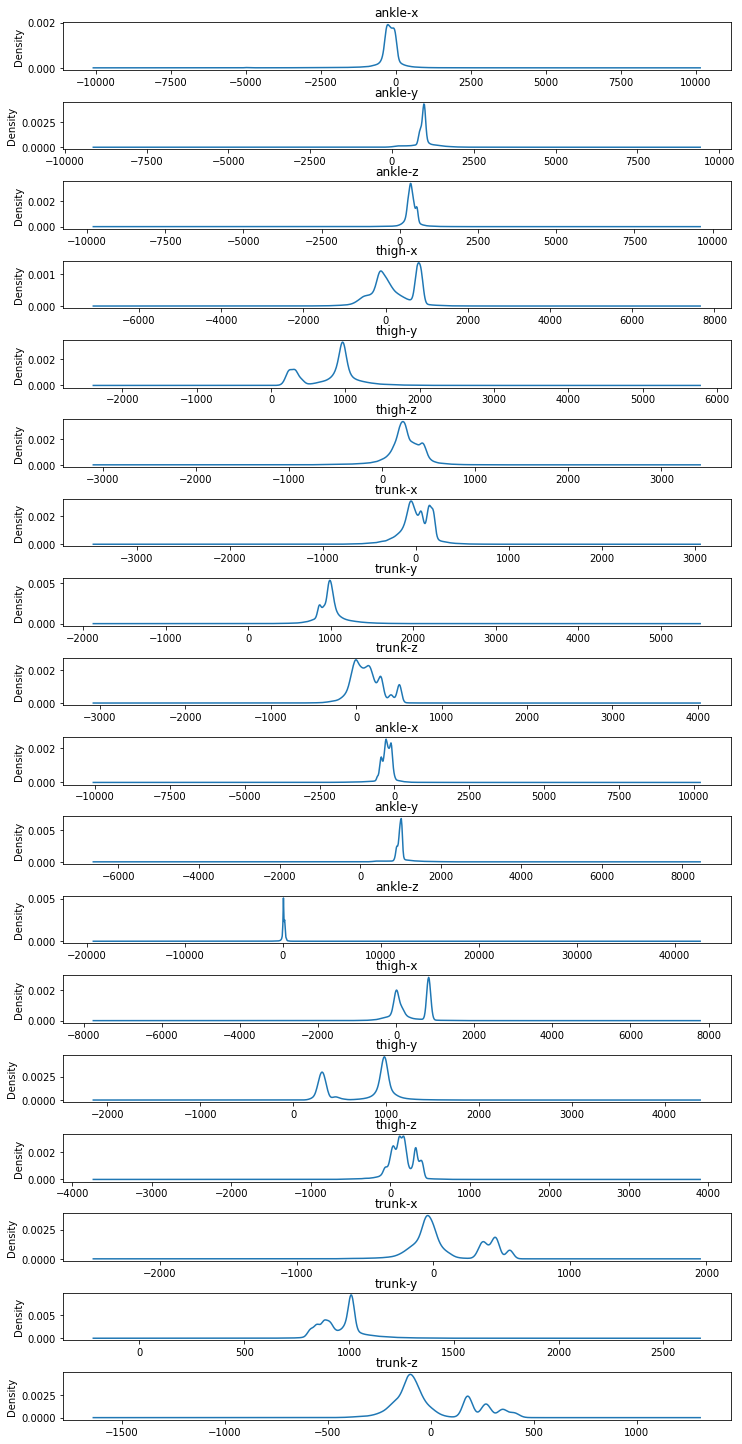

In [10]:
#Visualizing data based on density
fig,axis=plt.subplots(18,figsize=(10,20))
fig.tight_layout()
count=0
for obj in dataList[:2]:
    for index,colName in enumerate(obj.columns):
        if colName in ["annontations","Time"]:
            continue
        obj[colName].plot(ax=axis[count],x=colName,y="Time",kind="density",title=colName)
        count+=1


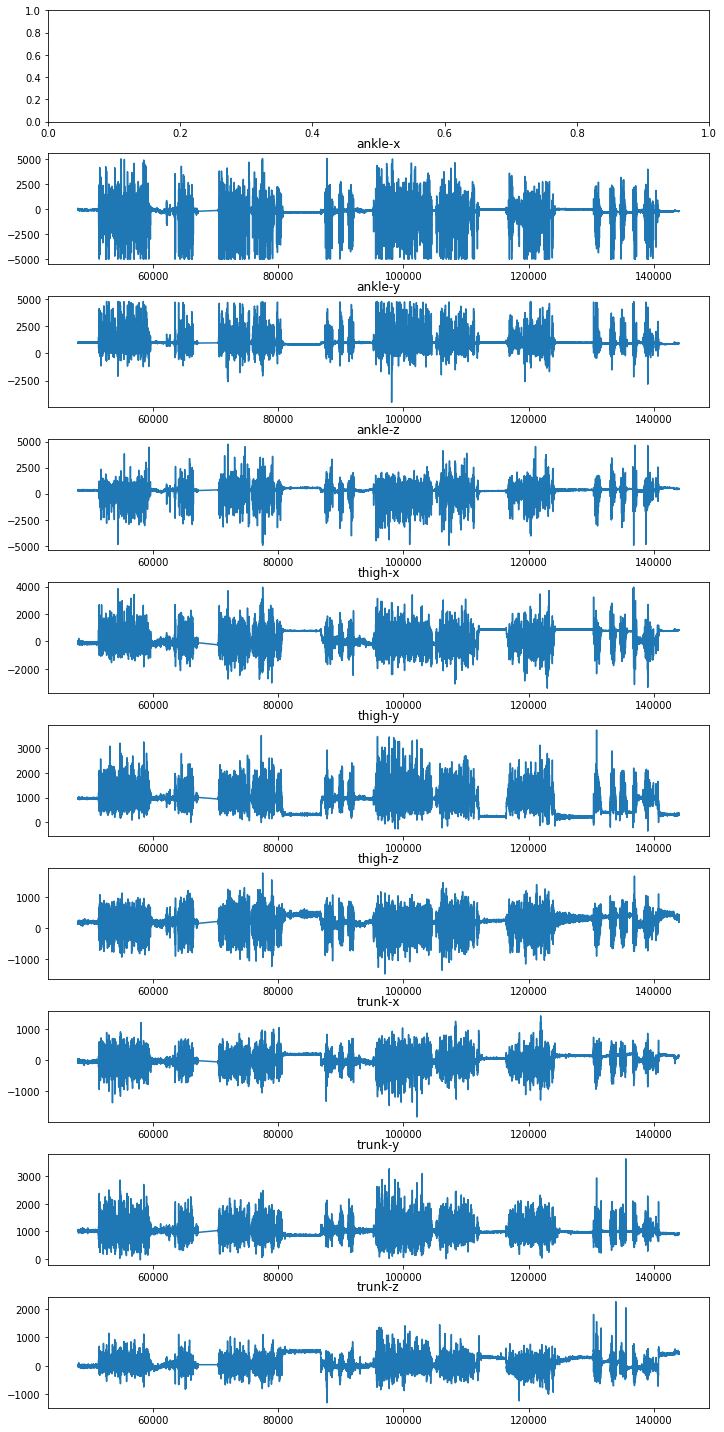

In [11]:
#Visualizing data based on line graph
fig,axis=plt.subplots(10,1,figsize=(10,20))
fig.tight_layout()

for obj in dataList:
    
    for index,colName in enumerate(obj.columns):
        if colName in ["annontations","Time"]:
            continue
        obj[colName].plot(ax=axis[index],x=colName,y="Time",kind="line",title=colName)
    break

In [12]:
#Merging all data into one for easier access
df_all = pd.DataFrame() 
for obj in dataList:
   df_all = pd.concat([df_all, obj]) 

In [13]:
df_all.head()

,Time,ankle-x,ankle-y,ankle-z,thigh-x,thigh-y,thigh-z,trunk-x,trunk-y,trunk-z,annontations
47999,750000,-30,990,326,-45,972,181,-38,1000,29,1
48000,750015,-30,1000,356,-18,981,212,-48,1028,29,1
48001,750031,-20,990,336,18,981,222,-38,1038,9,1
48002,750046,-20,1000,316,36,990,222,-19,1038,9,1
48003,750062,0,990,316,36,990,212,-29,1038,29,1


In [14]:
df_all.shape

(1140835, 11)

In [15]:
X=df_all.iloc[:,1:10].values
Y=df_all.iloc[:,-1].values

In [16]:
#Splitting Test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Most of the times, dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations. We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale, like 0–100 or 0–1.

We will use StandardScaler method from SciKit-Learn library

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

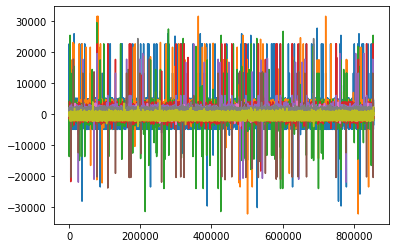

In [18]:
plt.plot(X_train)

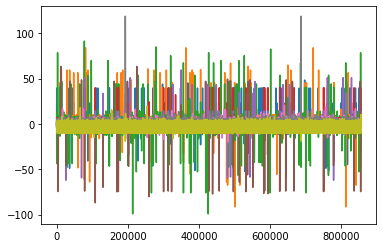

In [19]:
plt.plot(X_train_scaled)

```
We have different types of classification algorithms in Machine Learning :-

Logistic Regression

Nearest Neighbor

Naïve Bayes

Decision Tree Algorithm

Random Forest Classification

Lets start applying the algorithms
```

In [20]:
def LogisticRegression(X_train,Y_train):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, Y_train)
    return classifier
def nearestNeighbour(X_train,Y_train):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, Y_train)
    return classifier
def naiveBayes(X_train,Y_train):
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train, Y_train)
    return classifier
def decisionTree(X_train,Y_train):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, Y_train)
    return classifier
def randomForest(X_train,Y_train):
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, Y_train)
    return classifier

In [21]:
classifications=[LogisticRegression,nearestNeighbour,naiveBayes,decisionTree,randomForest]

In [23]:
preds=list()
cms=list()
for classification in classifications:
    classifier=classification(X_train_scaled,Y_train)
    Y_pred=classifier.predict(X_test_scaled)
    preds.append(Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)
    cms.append(cm)

   

In [26]:
def calculateAccuracyFromCM(matrix):
    return ((matrix[0][0]+matrix[1][1])/(sum(matrix[0])+sum(matrix[1])))*100


def calculatePrecisionFromCM(matrix):
    return (matrix[0][0]/(matrix[0][0]+matrix[1][0]))*100


def calculateRecallFromCM(matrix):
    return (matrix[0][0]/(matrix[0][0]+matrix[1][1]))*100

def calculateF1Score(precision,recall):
    return 2*(precision*recall)/(precision+recall)


In [27]:
for index,classification in enumerate(classifications):
    print(classification.__name__+":")
    print("\t"+ "Accuracy: "+str(calculateAccuracyFromCM(cms[index])))
    print("\t"+ "Precision: "+str(calculatePrecisionFromCM(cms[index])))
    print("\t"+ "Recall: "+str(calculateRecallFromCM(cms[index])))
    print("\t"+ "F1Score: "+str(calculateF1Score(calculatePrecisionFromCM(cms[index]),calculateRecallFromCM(cms[index]))))

    print("-"*50)

LogisticRegression:
	Accuracy: 90.05010360823115
	Precision: 90.27515966575696
	Recall: 99.94587880746482
	F1Score: 94.86469256709935
--------------------------------------------------
nearestNeighbour:
	Accuracy: 92.04968987654667
	Precision: 94.16297611835842
	Recall: 95.32327241423968
	F1Score: 94.73957179875941
--------------------------------------------------
naiveBayes:
	Accuracy: 81.39083970000947
	Precision: 91.47934182909154
	Recall: 97.06936510808413
	F1Score: 94.19148798314568
--------------------------------------------------
decisionTree:
	Accuracy: 88.7896244508413
	Precision: 93.879505315484
	Recall: 95.23448482838143
	F1Score: 94.55214093745283
--------------------------------------------------
randomForest:
	Accuracy: 91.7881273031356
	Precision: 92.81785344395364
	Recall: 96.88068207862851
	F1Score: 94.80576037081686
--------------------------------------------------


## Conclusion:
- As seen from the given result we can see **Nearest Neighbor** seems to be a better model compartively. 